In [1]:
from utils import *
import pandas as pd
import matplotlib.pyplot as plt


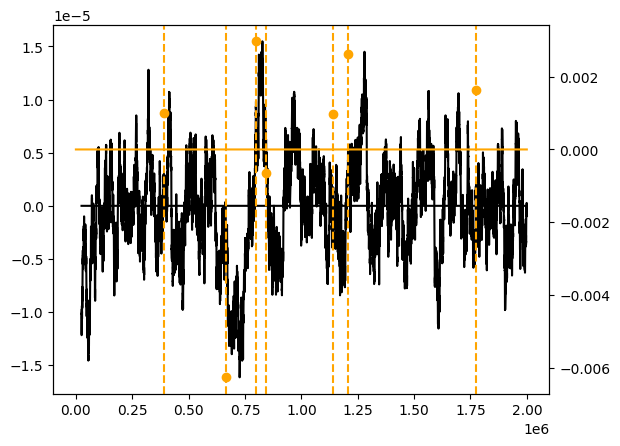

In [2]:
reader = PriceReader()
trn = reader(['DIVING_GEAR'], [0, 1])
dlp = reader(['DOLPHIN_SIGHTINGS'], [0, 1])

s = 250
trn['ema_change'] = trn['mid_price'].pct_change().ewm(span=s).mean()
dlp['pct_change'] = dlp['mid_price'].pct_change()

threshold = 0.0004

fig, ax1 = plt.subplots()
ax1.plot(trn[s:].index, trn['ema_change'][s:], color='black')
ax1.plot(trn[s:].index, [0] * len(trn[s:].index), color='black')

ax2 = ax1.twinx()
ax2.plot(dlp.index, [0] * len(dlp.index), color='orange')
ax2.scatter(dlp[abs(dlp['pct_change']) > threshold].index, dlp[abs(
    dlp['pct_change']) > threshold]['pct_change'], color='orange')
for xc in dlp[abs(dlp['pct_change']) > threshold].index:
    ax2.axvline(x=xc, color='orange', linestyle='--')

plt.show()


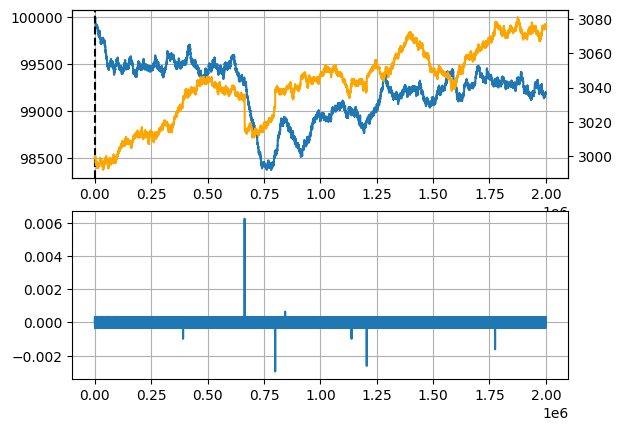

In [3]:
fig, axl = plt.subplots(2, 1)
axl[0].plot(trn['mid_price'])

axr = axl[0].twinx()
axr.plot(dlp['mid_price'], color='orange')

# axl[1].plot(dlp.rolling(100).std()['mid_price'])
# axl[1].plot([3] * len(dlp.index) * 100, color='black')


dlp['log_returns'] = np.log(dlp['mid_price'].shift(1) / dlp['mid_price'])
# dlp['log_returns'].plot()

axl[1].plot(dlp['log_returns'])

axl[0].axvline(x=dlp.index[0], color='black', linestyle='--')

axl[0].grid(True, axis='both')
axl[1].grid(True, axis='both')

plt.show()


'\ncalculuate log returns for both dlp and trn\nremove outliers\ncalculate\ntrain classifer kmeans\n'

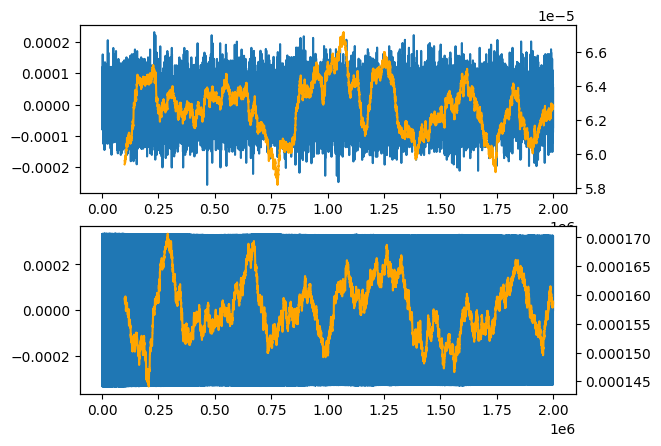

In [4]:
trn = reader(['DIVING_GEAR'], [0, 1])
dlp = reader(['DOLPHIN_SIGHTINGS'], [0, 1])

trn['log_returns'] = np.log(trn['mid_price'].shift(1) / trn['mid_price'])
dlp['log_returns'] = np.log(dlp['mid_price'].shift(1) / dlp['mid_price'])

dlp = dlp.loc[abs(dlp['log_returns']) < 0.0005]
trn = trn.loc[dlp.index]

fig, axl = plt.subplots(2, 1)
axl[0].plot(trn['log_returns'])
axl[1].plot(dlp['log_returns'])

s = 1000
trn['vol'] = trn['log_returns'].rolling(s).std()
dlp['vol'] = dlp['log_returns'].rolling(s).std()

axr = [axl[0].twinx(), axl[1].twinx()]
axr[0].plot(trn['vol'], color='orange')
axr[1].plot(dlp['vol'], color='orange')

"""
calculuate log returns for both dlp and trn
remove outliers
calculate
train classifer kmeans
"""


In [8]:
import sklearn

ModuleNotFoundError: No module named 'sklearn'